## Resume Sorting

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from wordcloud import WordCloud

word_cloud = WordCloud(stopwords=None)

In [3]:
import warnings
warnings.filterwarnings('ignore')

## Import Dataset

### Dataset 1

In [4]:
df1 = pd.read_csv('01_people.csv', usecols=['person_id', 'name'])
df1.head(3)

,person_id,name
0,1,Database Administrator
1,2,Database Administrator
2,3,Oracle Database Administrator


#### Value Counts of PersonId

In [5]:
df1['person_id'].value_counts()

person_id
1        1
36615    1
36617    1
36618    1
36619    1
        ..
18315    1
18316    1
18317    1
18318    1
54933    1
Name: count, Length: 54933, dtype: int64

### Dataset 2

In [6]:
df2 = pd.read_csv('02_abilities.csv')
df2.head(3)

,person_id,ability
0,1,Installation and Building Server
1,1,Running Backups
2,1,Recovering and Restoring Models


#### Adding Separator at end

In [7]:
df2['ability'] = df2['ability'].apply(lambda x: x + ', ')
df2.head(3)

,person_id,ability
0,1,"Installation and Building Server,"
1,1,"Running Backups,"
2,1,"Recovering and Restoring Models,"


#### Grouping by PersonId

In [8]:
df2 = pd.DataFrame(df2.groupby(by='person_id', axis = 0)['ability'].sum())
df2.head(3)

,ability
person_id,
1,"Installation and Building Server, Running Back..."
2,"database management systems administration, de..."
3,"Over 4+ years of Experience as Architecture, E..."


#### Merging Dataframes

In [9]:
resume_df = pd.merge(df1, df2, on='person_id')
resume_df.head(3)

,person_id,name,ability
0,1,Database Administrator,"Installation and Building Server, Running Back..."
1,2,Database Administrator,"database management systems administration, de..."
2,3,Oracle Database Administrator,"Over 4+ years of Experience as Architecture, E..."


#### Value Counts of PersonId

In [10]:
resume_df['person_id'].value_counts()

person_id
1        1
36614    1
36616    1
36617    1
36618    1
        ..
18315    1
18316    1
18317    1
18318    1
54933    1
Name: count, Length: 54930, dtype: int64

### Dataset 3

In [11]:
df3 = pd.read_csv('03_education.csv')
df3.head(3)

,person_id,institution,program,start_date,location
0,1,Lead City University,Bachelor of Science,07/2013,NaN
1,2,lagos state university,bsc in computer science,NaN,"Lagos, GU"
2,3,"JNTU - Kakinada, Andhra Pradesh",Master of Computer Applications in Science and...,2013,"Kakinada, Andhra Pradesh"


#### Value Counts of PersonId

In [12]:
df3['person_id'].value_counts()

person_id
7746     15
44368    15
26057    15
25270    10
6959     10
         ..
23094     1
23092     1
23090     1
23089     1
54928     1
Name: count, Length: 48075, dtype: int64

#### Adding Separator at end

In [13]:
df3[['institution','program','start_date','location']] = df3[['institution','program','start_date','location']].apply(lambda x: x + ', ')

#### Grouping by PersonId

In [14]:
df3 = df3.groupby(by='person_id')[['institution','program','start_date','location']].sum()

#### Renaming Columns

In [15]:
df3.rename(columns={'start_date':'education_start_date', 'location': 'education_location'}, inplace=True)
df3.head(3)

,institution,program,education_start_date,education_location
person_id,,,,
1,"Lead City University,","Bachelor of Science,","07/2013,",0
2,"lagos state university,","bsc in computer science,",0,"Lagos, GU,"
3,"JNTU - Kakinada, Andhra Pradesh,",Master of Computer Applications in Science and...,"2013,","Kakinada, Andhra Pradesh,"


#### Reseting Index

In [16]:
df3.reset_index(inplace=True)

In [17]:
df3.head(3)

,person_id,institution,program,education_start_date,education_location
0,1,"Lead City University,","Bachelor of Science,","07/2013,",0
1,2,"lagos state university,","bsc in computer science,",0,"Lagos, GU,"
2,3,"JNTU - Kakinada, Andhra Pradesh,",Master of Computer Applications in Science and...,"2013,","Kakinada, Andhra Pradesh,"


#### Merging Dataframes

In [18]:
resume_df = pd.merge(resume_df, df3, on='person_id')
resume_df.head(3)

,person_id,name,ability,institution,program,education_start_date,education_location
0,1,Database Administrator,"Installation and Building Server, Running Back...","Lead City University,","Bachelor of Science,","07/2013,",0
1,2,Database Administrator,"database management systems administration, de...","lagos state university,","bsc in computer science,",0,"Lagos, GU,"
2,3,Oracle Database Administrator,"Over 4+ years of Experience as Architecture, E...","JNTU - Kakinada, Andhra Pradesh,",Master of Computer Applications in Science and...,"2013,","Kakinada, Andhra Pradesh,"


#### Value Counts of PersonId

In [19]:
resume_df['person_id'].value_counts()

person_id
1        1
36626    1
36609    1
36612    1
36613    1
        ..
18314    1
18315    1
18316    1
18317    1
54928    1
Name: count, Length: 48072, dtype: int64

### Dataset 4

In [20]:
df4 = pd.read_csv('04_experience.csv')
df4.head(3)

,person_id,title,firm,start_date,end_date,location
0,1,Database Administrator,Family Private Care LLC,04/2017,Present,"Roswell, GA"
1,1,Database Administrator,Incomm,01/2014,02/2017,"Alpharetta, GA"
2,2,Database Administrator,Intercontinental Registry,12/2008,08/2011,"Lagos, GU"


#### Dropping Unwanted Cols

In [21]:
df4.drop(columns='location', inplace=True)

#### Adding Separator at end

In [22]:
df4[['title','firm','start_date','end_date']] = df4[['title','firm','start_date','end_date']].apply(lambda x: x + ', ')

#### Grouping by PersonId

In [23]:
df4 = df4.groupby(by = 'person_id')[['title','firm','start_date','end_date']].sum()

#### Renaming Cols

In [24]:
df4.rename(columns={'title':'roles','firm':'company','start_date':'experience_start_date','end_date':'experience_end_date'}, inplace = True)

#### Reseting Index

In [25]:
df4.reset_index(inplace=True)

In [26]:
df4.head(3)

,person_id,roles,company,experience_start_date,experience_end_date
0,1,"Database Administrator, Database Administrator,","Family Private Care LLC, Incomm,","04/2017, 01/2014,","Present, 02/2017,"
1,2,"Database Administrator,","Intercontinental Registry,","12/2008,","08/2011,"
2,3,"Oracle Database Administrator, Oracle Database...","Cognizant, Convergys,","06/2016, 06/2014,","Present, 06/2016,"


#### Merging Dataframes

In [27]:
resume_df = pd.merge(resume_df, df4, on = 'person_id')
resume_df.head(3)

,person_id,name,ability,institution,program,education_start_date,education_location,roles,company,experience_start_date,experience_end_date
0,1,Database Administrator,"Installation and Building Server, Running Back...","Lead City University,","Bachelor of Science,","07/2013,",0,"Database Administrator, Database Administrator,","Family Private Care LLC, Incomm,","04/2017, 01/2014,","Present, 02/2017,"
1,2,Database Administrator,"database management systems administration, de...","lagos state university,","bsc in computer science,",0,"Lagos, GU,","Database Administrator,","Intercontinental Registry,","12/2008,","08/2011,"
2,3,Oracle Database Administrator,"Over 4+ years of Experience as Architecture, E...","JNTU - Kakinada, Andhra Pradesh,",Master of Computer Applications in Science and...,"2013,","Kakinada, Andhra Pradesh,","Oracle Database Administrator, Oracle Database...","Cognizant, Convergys,","06/2016, 06/2014,","Present, 06/2016,"


### Dataset 5

In [28]:
df5 = pd.read_csv('05_person_skills.csv')
df5.head(3)

,person_id,skill
0,1,Database administration
1,1,Database
2,1,Ms sql server


#### Adding Separator at end

In [29]:
df5['skill'] = df5['skill'].apply(lambda x: str(x) + ', ')

In [30]:
df5.head(3)

,person_id,skill
0,1,"Database administration,"
1,1,"Database,"
2,1,"Ms sql server,"


#### Grouping by PersonId

In [31]:
df5 = pd.DataFrame(df5.groupby(by='person_id')['skill'].sum())

#### Reseting Index

In [32]:
df5.reset_index(inplace=True)

In [33]:
df5.head(3)

,person_id,skill
0,1,"Database administration, Database, Ms sql serv..."
1,2,"sql server management studio, visual studio, s..."
2,3,"DATABASES, ORACLE (4 years), ORACLE 10G, SQL, ..."


#### Merging Dataframes

In [34]:
resume_df = pd.merge(resume_df, df5, on='person_id')
resume_df.head(3)

,person_id,name,ability,institution,program,education_start_date,education_location,roles,company,experience_start_date,experience_end_date,skill
0,1,Database Administrator,"Installation and Building Server, Running Back...","Lead City University,","Bachelor of Science,","07/2013,",0,"Database Administrator, Database Administrator,","Family Private Care LLC, Incomm,","04/2017, 01/2014,","Present, 02/2017,","Database administration, Database, Ms sql serv..."
1,2,Database Administrator,"database management systems administration, de...","lagos state university,","bsc in computer science,",0,"Lagos, GU,","Database Administrator,","Intercontinental Registry,","12/2008,","08/2011,","sql server management studio, visual studio, s..."
2,3,Oracle Database Administrator,"Over 4+ years of Experience as Architecture, E...","JNTU - Kakinada, Andhra Pradesh,",Master of Computer Applications in Science and...,"2013,","Kakinada, Andhra Pradesh,","Oracle Database Administrator, Oracle Database...","Cognizant, Convergys,","06/2016, 06/2014,","Present, 06/2016,","DATABASES, ORACLE (4 years), ORACLE 10G, SQL, ..."


#### Value Counts of PersonId

In [35]:
resume_df['person_id'].value_counts()

person_id
1        1
36626    1
36609    1
36612    1
36613    1
        ..
18314    1
18315    1
18316    1
18317    1
54928    1
Name: count, Length: 48000, dtype: int64

## Data Cleaning

#### Remove Duplicates

In [36]:
resume_df.duplicated().sum()

0

#### Shape

In [37]:
resume_df.shape

(48000, 12)

#### Nulls

In [38]:
resume_df.isnull().sum()

person_id                  0
name                     102
ability                    0
institution                0
program                    0
education_start_date       0
education_location         0
roles                      0
company                    0
experience_start_date      0
experience_end_date        0
skill                      0
dtype: int64

#### Remove Nulls

In [39]:
resume_df.dropna(inplace=True, ignore_index=True)

In [40]:
resume_df.shape

(47898, 12)

#### Rename Columns

In [41]:
resume_df.rename(columns={'person_id':'Person_ID', 'name':'Name', 'ability':'Abilities', 'institution':'Studied_In', 'program':'Program_Studied',
                          'education_start_date':'Education_Start_Date', 'education_location':'Education_Location', 'roles':'Roles', 
                          'company':'Companies', 'experience_start_date':'Experience_Start_Dates', 'experience_end_date':'Experience_End_Dates',
                          'skill':'Skills'}, inplace=True)

In [42]:
resume_df.columns

Index(['Person_ID', 'Name', 'Abilities', 'Studied_In', 'Program_Studied',
       'Education_Start_Date', 'Education_Location', 'Roles', 'Companies',
       'Experience_Start_Dates', 'Experience_End_Dates', 'Skills'],
      dtype='object')

In [43]:
resume_df.head(3)

,Person_ID,Name,Abilities,Studied_In,Program_Studied,Education_Start_Date,Education_Location,Roles,Companies,Experience_Start_Dates,Experience_End_Dates,Skills
0,1,Database Administrator,"Installation and Building Server, Running Back...","Lead City University,","Bachelor of Science,","07/2013,",0,"Database Administrator, Database Administrator,","Family Private Care LLC, Incomm,","04/2017, 01/2014,","Present, 02/2017,","Database administration, Database, Ms sql serv..."
1,2,Database Administrator,"database management systems administration, de...","lagos state university,","bsc in computer science,",0,"Lagos, GU,","Database Administrator,","Intercontinental Registry,","12/2008,","08/2011,","sql server management studio, visual studio, s..."
2,3,Oracle Database Administrator,"Over 4+ years of Experience as Architecture, E...","JNTU - Kakinada, Andhra Pradesh,",Master of Computer Applications in Science and...,"2013,","Kakinada, Andhra Pradesh,","Oracle Database Administrator, Oracle Database...","Cognizant, Convergys,","06/2016, 06/2014,","Present, 06/2016,","DATABASES, ORACLE (4 years), ORACLE 10G, SQL, ..."


#### Drop Unwanted Columns

In [44]:
resume_df.drop(columns=['Person_ID','Education_Start_Date','Education_Location'], inplace=True)

In [45]:
resume_df.head(3)

,Name,Abilities,Studied_In,Program_Studied,Roles,Companies,Experience_Start_Dates,Experience_End_Dates,Skills
0,Database Administrator,"Installation and Building Server, Running Back...","Lead City University,","Bachelor of Science,","Database Administrator, Database Administrator,","Family Private Care LLC, Incomm,","04/2017, 01/2014,","Present, 02/2017,","Database administration, Database, Ms sql serv..."
1,Database Administrator,"database management systems administration, de...","lagos state university,","bsc in computer science,","Database Administrator,","Intercontinental Registry,","12/2008,","08/2011,","sql server management studio, visual studio, s..."
2,Oracle Database Administrator,"Over 4+ years of Experience as Architecture, E...","JNTU - Kakinada, Andhra Pradesh,",Master of Computer Applications in Science and...,"Oracle Database Administrator, Oracle Database...","Cognizant, Convergys,","06/2016, 06/2014,","Present, 06/2016,","DATABASES, ORACLE (4 years), ORACLE 10G, SQL, ..."


#### Dataframe Information

In [46]:
resume_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47898 entries, 0 to 47897
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Name                    47898 non-null  object
 1   Abilities               47898 non-null  object
 2   Studied_In              47898 non-null  object
 3   Program_Studied         47898 non-null  object
 4   Roles                   47898 non-null  object
 5   Companies               47898 non-null  object
 6   Experience_Start_Dates  47898 non-null  object
 7   Experience_End_Dates    47898 non-null  object
 8   Skills                  47898 non-null  object
dtypes: object(9)
memory usage: 3.3+ MB


#### Feature Extraction

In [47]:
resume_df['Worked_Companies'] = resume_df['Companies'].apply(lambda x: len(str(x).rstrip(', ').split(',')))

resume_df.head(3)

,Name,Abilities,Studied_In,Program_Studied,Roles,Companies,Experience_Start_Dates,Experience_End_Dates,Skills,Worked_Companies
0,Database Administrator,"Installation and Building Server, Running Back...","Lead City University,","Bachelor of Science,","Database Administrator, Database Administrator,","Family Private Care LLC, Incomm,","04/2017, 01/2014,","Present, 02/2017,","Database administration, Database, Ms sql serv...",2
1,Database Administrator,"database management systems administration, de...","lagos state university,","bsc in computer science,","Database Administrator,","Intercontinental Registry,","12/2008,","08/2011,","sql server management studio, visual studio, s...",1
2,Oracle Database Administrator,"Over 4+ years of Experience as Architecture, E...","JNTU - Kakinada, Andhra Pradesh,",Master of Computer Applications in Science and...,"Oracle Database Administrator, Oracle Database...","Cognizant, Convergys,","06/2016, 06/2014,","Present, 06/2016,","DATABASES, ORACLE (4 years), ORACLE 10G, SQL, ...",2


In [48]:
resume_df['Experience_End_Dates'] = resume_df['Experience_End_Dates'].str.lower()

In [49]:
resume_df['Is_Working_Now'] = resume_df['Experience_End_Dates'].apply(lambda x: 'Yes' if ('present' in x or 'current' in x) else 'No')
resume_df.head(3)

,Name,Abilities,Studied_In,Program_Studied,Roles,Companies,Experience_Start_Dates,Experience_End_Dates,Skills,Worked_Companies,Is_Working_Now
0,Database Administrator,"Installation and Building Server, Running Back...","Lead City University,","Bachelor of Science,","Database Administrator, Database Administrator,","Family Private Care LLC, Incomm,","04/2017, 01/2014,","present, 02/2017,","Database administration, Database, Ms sql serv...",2,Yes
1,Database Administrator,"database management systems administration, de...","lagos state university,","bsc in computer science,","Database Administrator,","Intercontinental Registry,","12/2008,","08/2011,","sql server management studio, visual studio, s...",1,No
2,Oracle Database Administrator,"Over 4+ years of Experience as Architecture, E...","JNTU - Kakinada, Andhra Pradesh,",Master of Computer Applications in Science and...,"Oracle Database Administrator, Oracle Database...","Cognizant, Convergys,","06/2016, 06/2014,","present, 06/2016,","DATABASES, ORACLE (4 years), ORACLE 10G, SQL, ...",2,Yes


In [50]:
resume_df['Experience_Start_Dates'] = resume_df['Experience_Start_Dates'].str.strip(', ')

In [51]:
resume_df['Experience_End_Dates'] = resume_df['Experience_End_Dates'].str.strip(', ')

In [52]:
resume_df['Experience_End_Dates'] = resume_df['Experience_End_Dates'].apply(lambda x: '2024' if ('present' in x or 'current' in x) else x)

resume_df.head(3)

,Name,Abilities,Studied_In,Program_Studied,Roles,Companies,Experience_Start_Dates,Experience_End_Dates,Skills,Worked_Companies,Is_Working_Now
0,Database Administrator,"Installation and Building Server, Running Back...","Lead City University,","Bachelor of Science,","Database Administrator, Database Administrator,","Family Private Care LLC, Incomm,","04/2017, 01/2014",2024,"Database administration, Database, Ms sql serv...",2,Yes
1,Database Administrator,"database management systems administration, de...","lagos state university,","bsc in computer science,","Database Administrator,","Intercontinental Registry,",12/2008,08/2011,"sql server management studio, visual studio, s...",1,No
2,Oracle Database Administrator,"Over 4+ years of Experience as Architecture, E...","JNTU - Kakinada, Andhra Pradesh,",Master of Computer Applications in Science and...,"Oracle Database Administrator, Oracle Database...","Cognizant, Convergys,","06/2016, 06/2014",2024,"DATABASES, ORACLE (4 years), ORACLE 10G, SQL, ...",2,Yes


#### Year Extractor Function

In [ ]:
import re
separators = [' ', '/']
sep = '|'.join(map(re.escape, separators))
pat_19 = r'^9\d'
pat_year = r'^20\d{2}|19\d{2}'
pat_20 = r'^[0-2]\d'

In [ ]:
def YearExtractor(x):
    dates = x.split(', ')
    years = []
    for i in dates:
        d = re.split(sep, i)
        if len(d) == 2:
            a, b = d
            if re.match(pat_year, a):
                years.append(int(a))
            elif re.match(pat_year, b):
                years.append(int(b))
            elif re.match(pat_19, b) and int(a) <= 12:
                year = '19'+b
                years.append(int(year))
            elif re.match(pat_19, a):
                year = '19'+a
                years.append(int(year))
            elif re.match(pat_20, b) and int(a) <= 12:
                year = '20'+b
                years.append(int(year))
            elif re.match(pat_20, a):
                year = '20'+a
                years.append(int(year))
        elif len(d) == 3:
            a, c, b = d
            if re.match(pat_year, a):
                years.append(int(a))
            elif re.match(pat_year, b):
                years.append(int(b))
            elif re.match(pat_19, b) and int(a) <= 12:
                year = '19'+b
                years.append(int(year))
            elif re.match(pat_19, a):
                year = '19'+a
                years.append(int(year))
            elif re.match(pat_20, b) and int(a) <= 12:
                year = '20'+b
                years.append(int(year))
            elif re.match(pat_20, a):
                year = '20'+a
                years.append(int(year))
        else:
            if re.match(pat_year, d[0]):
                years.append(int(d[0]))
            elif re.match(pat_19, d[0]):
                year = '19'+d[0]
                years.append(int(year))
            elif re.match(pat_20, d[0]):
                year = '20'+d[0]
                years.append(int(year))
    return years

In [54]:
resume_df['Experience_Start_Dates'] = resume_df['Experience_Start_Dates'].apply(YearExtractor)

In [55]:
resume_df['Experience_End_Dates'] = resume_df['Experience_End_Dates'].apply(YearExtractor)

In [56]:
resume_df.head(3)

,Name,Abilities,Studied_In,Program_Studied,Roles,Companies,Experience_Start_Dates,Experience_End_Dates,Skills,Worked_Companies,Is_Working_Now
0,Database Administrator,"Installation and Building Server, Running Back...","Lead City University,","Bachelor of Science,","Database Administrator, Database Administrator,","Family Private Care LLC, Incomm,","[2017, 2014]",[2024],"Database administration, Database, Ms sql serv...",2,Yes
1,Database Administrator,"database management systems administration, de...","lagos state university,","bsc in computer science,","Database Administrator,","Intercontinental Registry,",[2008],[2011],"sql server management studio, visual studio, s...",1,No
2,Oracle Database Administrator,"Over 4+ years of Experience as Architecture, E...","JNTU - Kakinada, Andhra Pradesh,",Master of Computer Applications in Science and...,"Oracle Database Administrator, Oracle Database...","Cognizant, Convergys,","[2016, 2014]",[2024],"DATABASES, ORACLE (4 years), ORACLE 10G, SQL, ...",2,Yes


In [57]:
resume_df['Experience_End_Year'] = resume_df['Experience_End_Dates'].apply(lambda x: np.max(x))

In [58]:
resume_df['Experience_Start_Year'] = resume_df['Experience_Start_Dates'].apply(lambda x: np.min(x))

In [59]:
resume_df.head(3)

,Name,Abilities,Studied_In,Program_Studied,Roles,Companies,Experience_Start_Dates,Experience_End_Dates,Skills,Worked_Companies,Is_Working_Now,Experience_End_Year,Experience_Start_Year
0,Database Administrator,"Installation and Building Server, Running Back...","Lead City University,","Bachelor of Science,","Database Administrator, Database Administrator,","Family Private Care LLC, Incomm,","[2017, 2014]",[2024],"Database administration, Database, Ms sql serv...",2,Yes,2024,2014
1,Database Administrator,"database management systems administration, de...","lagos state university,","bsc in computer science,","Database Administrator,","Intercontinental Registry,",[2008],[2011],"sql server management studio, visual studio, s...",1,No,2011,2008
2,Oracle Database Administrator,"Over 4+ years of Experience as Architecture, E...","JNTU - Kakinada, Andhra Pradesh,",Master of Computer Applications in Science and...,"Oracle Database Administrator, Oracle Database...","Cognizant, Convergys,","[2016, 2014]",[2024],"DATABASES, ORACLE (4 years), ORACLE 10G, SQL, ...",2,Yes,2024,2014


In [60]:
resume_df['Total_Experience'] = resume_df['Experience_End_Year'] - resume_df['Experience_Start_Year']

In [61]:
resume_df.head(3)

,Name,Abilities,Studied_In,Program_Studied,Roles,Companies,Experience_Start_Dates,Experience_End_Dates,Skills,Worked_Companies,Is_Working_Now,Experience_End_Year,Experience_Start_Year,Total_Experience
0,Database Administrator,"Installation and Building Server, Running Back...","Lead City University,","Bachelor of Science,","Database Administrator, Database Administrator,","Family Private Care LLC, Incomm,","[2017, 2014]",[2024],"Database administration, Database, Ms sql serv...",2,Yes,2024,2014,10
1,Database Administrator,"database management systems administration, de...","lagos state university,","bsc in computer science,","Database Administrator,","Intercontinental Registry,",[2008],[2011],"sql server management studio, visual studio, s...",1,No,2011,2008,3
2,Oracle Database Administrator,"Over 4+ years of Experience as Architecture, E...","JNTU - Kakinada, Andhra Pradesh,",Master of Computer Applications in Science and...,"Oracle Database Administrator, Oracle Database...","Cognizant, Convergys,","[2016, 2014]",[2024],"DATABASES, ORACLE (4 years), ORACLE 10G, SQL, ...",2,Yes,2024,2014,10


#### Drop Unwanted Columns:

In [62]:
resume_df.drop(columns=['Experience_Start_Dates','Experience_End_Dates','Experience_End_Year','Experience_Start_Year'], inplace=True)
resume_df.head(3)

,Name,Abilities,Studied_In,Program_Studied,Roles,Companies,Skills,Worked_Companies,Is_Working_Now,Total_Experience
0,Database Administrator,"Installation and Building Server, Running Back...","Lead City University,","Bachelor of Science,","Database Administrator, Database Administrator,","Family Private Care LLC, Incomm,","Database administration, Database, Ms sql serv...",2,Yes,10
1,Database Administrator,"database management systems administration, de...","lagos state university,","bsc in computer science,","Database Administrator,","Intercontinental Registry,","sql server management studio, visual studio, s...",1,No,3
2,Oracle Database Administrator,"Over 4+ years of Experience as Architecture, E...","JNTU - Kakinada, Andhra Pradesh,",Master of Computer Applications in Science and...,"Oracle Database Administrator, Oracle Database...","Cognizant, Convergys,","DATABASES, ORACLE (4 years), ORACLE 10G, SQL, ...",2,Yes,10


#### Standardization

In [63]:
resume_df[['Name','Studied_In','Program_Studied', 'Companies']] = resume_df[['Name','Studied_In','Program_Studied', 'Companies']].apply(lambda x:''.join([i for i in x if not str(i).isnumeric()]))

In [64]:
resume_df.head(3)

,Name,Abilities,Studied_In,Program_Studied,Roles,Companies,Skills,Worked_Companies,Is_Working_Now,Total_Experience
0,Database AdministratorDatabase AdministratorOr...,"Installation and Building Server, Running Back...","Lead City University, lagos state university, ...","Bachelor of Science, bsc in computer science, ...","Database Administrator, Database Administrator,","Family Private Care LLC, Incomm, Intercontinen...","Database administration, Database, Ms sql serv...",2,Yes,10
1,Database AdministratorDatabase AdministratorOr...,"database management systems administration, de...","Lead City University, lagos state university, ...","Bachelor of Science, bsc in computer science, ...","Database Administrator,","Family Private Care LLC, Incomm, Intercontinen...","sql server management studio, visual studio, s...",1,No,3
2,Database AdministratorDatabase AdministratorOr...,"Over 4+ years of Experience as Architecture, E...","Lead City University, lagos state university, ...","Bachelor of Science, bsc in computer science, ...","Oracle Database Administrator, Oracle Database...","Family Private Care LLC, Incomm, Intercontinen...","DATABASES, ORACLE (4 years), ORACLE 10G, SQL, ...",2,Yes,10


## EDA

#### Columns : Worked_Companies, Is_Working_Now, Total_Experience

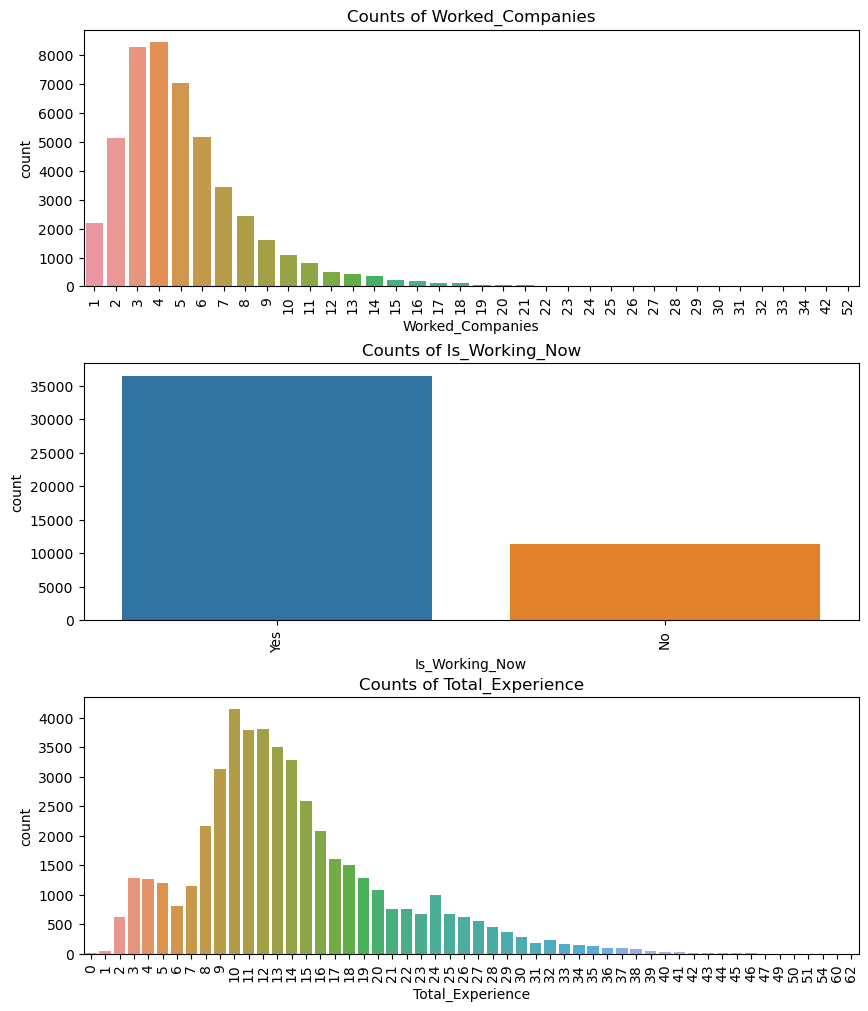

In [65]:
plt.subplots(3, 1, figsize = (10,12))
plt.subplots_adjust(hspace=0.3)

k = 1
for i in ['Worked_Companies', 'Is_Working_Now', 'Total_Experience']:
    plt.subplot(3, 1, k)
    sns.countplot(x = i, data = resume_df)
    plt.title(f'Counts of {i}')
    plt.xticks(rotation = 90)
    k += 1

plt.show()

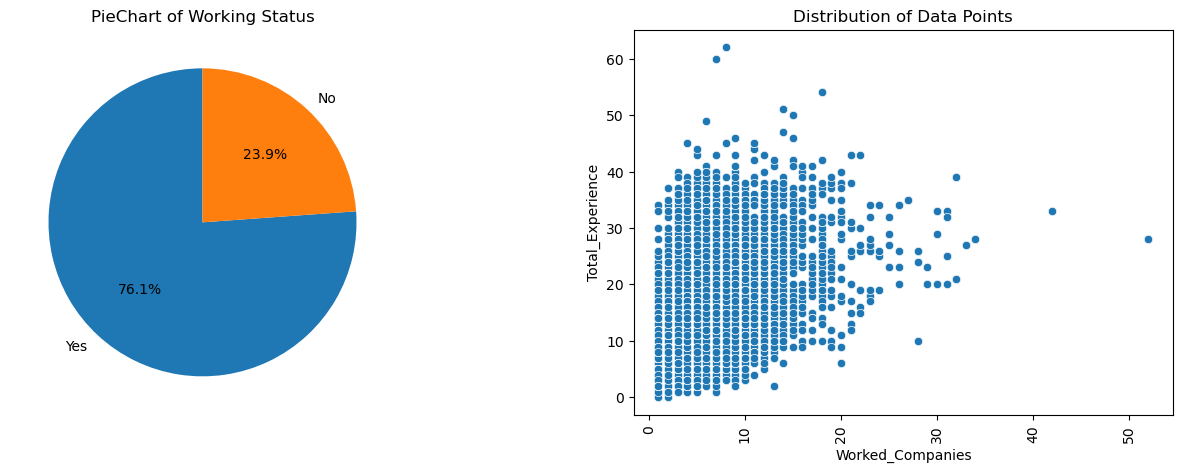

In [66]:
plt.subplots(1,2,figsize = (16,5))
plt.subplots_adjust(wspace=0.3)

plt.subplot(1,2,1)
col_dict = dict(resume_df['Is_Working_Now'].value_counts())
plt.pie(x = col_dict.values(), labels= col_dict.keys(), autopct='%1.1f%%', startangle=90)
plt.title('PieChart of Working Status')

plt.subplot(1,2,2)
sns.scatterplot(x = 'Worked_Companies', y = 'Total_Experience', data = resume_df)
plt.xticks(rotation = 90)
plt.title('Distribution of Data Points')

plt.show()

## Data Preprocessing

#### Analyzer

In [67]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string

ps = PorterStemmer()
def Analyzer(text):
    text = ''.join([i.lower() for i in text if i not in string.punctuation and not i.isnumeric()])
    tokens = word_tokenize(text)
    text = ' '.join(set([ps.stem(word) for word in tokens if word not in stopwords.words('english')]))
    return text

#### Column Transformer

In [68]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

cv_pipe = Pipeline(steps = [('count_vectorizer', CountVectorizer(analyzer=Analyzer))])

ct = ColumnTransformer(transformers=[('onehot', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), 
                                      ['Name','Studied_In','Program_Studied']), 
                                     ('encoder', OrdinalEncoder(categories=[['Yes','No']]), ['Is_Working_Now']), 
                                     ('scaler', MinMaxScaler(), ['Worked_Companies', 'Total_Experience'])], 
                       remainder='drop', sparse_threshold=0)
ct

ColumnTransformer(sparse_threshold=0,
                  transformers=[('onehot',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 ['Name', 'Studied_In', 'Program_Studied']),
                                ('encoder',
                                 OrdinalEncoder(categories=[['Yes', 'No']]),
                                 ['Is_Working_Now']),
                                ('scaler', MinMaxScaler(),
                                 ['Worked_Companies', 'Total_Experience'])])

In [69]:
abilities_pr = pd.DataFrame(cv_pipe.fit_transform(resume_df['Abilities']).toarray())

In [70]:
roles_pr = pd.DataFrame(cv_pipe.fit_transform(resume_df['Roles']).toarray())

In [71]:
skills_pr = pd.DataFrame(cv_pipe.fit_transform(resume_df['Skills']).toarray())

In [72]:
resume_df_pr = pd.DataFrame(ct.fit_transform(resume_df))

In [75]:
X = pd.concat([abilities_pr, roles_pr, skills_pr, resume_df_pr], axis = 1)
X.shape

(47898, 111)

## Model Building

In [77]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

model = Pipeline(steps=[('pca', PCA(n_components= 5)), ('kmeans', KMeans(n_clusters=2))])
model.fit(X)

Pipeline(steps=[('pca', PCA(n_components=5)), ('kmeans', KMeans(n_clusters=2))])

## Model Evaluation

In [85]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

y_pred = model.predict(X)
resume_df['Labels'] = y_pred

print('Silhouette Score: ', silhouette_score(X, model.steps[1][1].labels_))
print('Calinski Harbaz Score: ', calinski_harabasz_score(X, model.steps[1][1].labels_))
print('Davies Bouldin Score: ', davies_bouldin_score(X, model.steps[1][1].labels_))

Silhouette Score:  0.5504429851798414
Calinski Harbaz Score:  29391.06859135882
Davies Bouldin Score:  1.021763573957679


#### Accuracy of Labels with Predictions

In [86]:
from sklearn.metrics import accuracy_score
print('Labels and Predictions Accuracy: ', accuracy_score(model.steps[1][1].labels_, y_pred))

Labels and Predictions Accuracy:  1.0


## Clustered Resumes In Plot

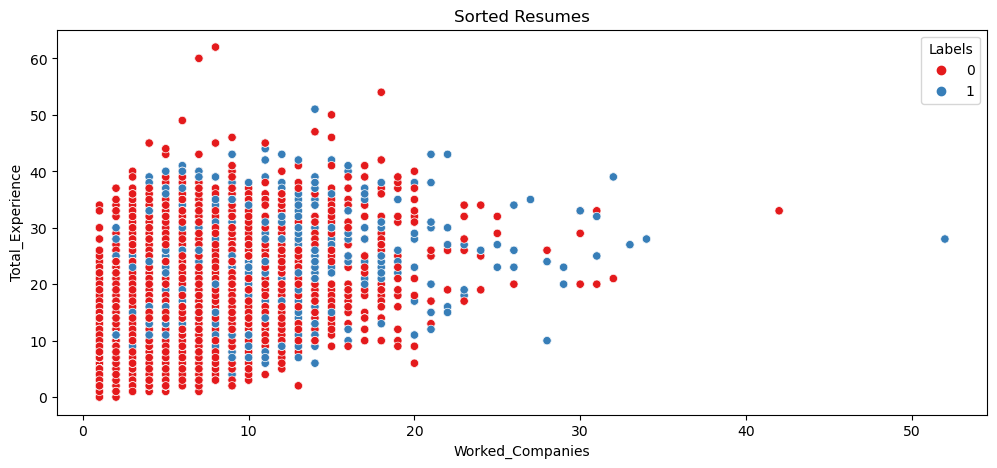

In [88]:
plt.figure(figsize=(12, 5))
sns.scatterplot(x = 'Worked_Companies', y = 'Total_Experience', data = resume_df, hue = 'Labels', palette='Set1')
plt.title('Sorted Resumes')
plt.show()

#### Value Counts of Labels

In [89]:
resume_df['Labels'].value_counts()

Labels
0    40221
1     7677
Name: count, dtype: int64